


# Part 2 : Model-Training & CNN Test

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [2]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['2025']]

In [3]:
df_train.drop(df_train.columns[[45*45]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

from keras import backend as K
# K.image_data_format()

In [5]:
labels=np.array(labels)
labels

array([[ 3],
       [ 2],
       [10],
       ...,
       [10],
       [11],
       [11]])

In [6]:

cat=to_categorical(labels,num_classes=13)
print(cat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
df_train.shape

(206881, 2025)

In [8]:
temp=df_train.to_numpy()
X_train = temp.reshape(temp.shape[0], 45, 45, 1)
X_train.shape

(206881, 45, 45, 1)

In [9]:
l=[]
for i in range(df_train.shape[0]):
    l.append(np.array(df_train[i:i+1]).reshape(1,45,45))

In [10]:
np.random.seed(7)

## Building the CNN model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(45,45,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\project\python\handwritten-equation-recognition\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the model

In [12]:
# from keras.models import model_from_json

Epoch 1/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 88s 102ms/step - accuracy: 0.8676 - loss: 0.9889 - val_accuracy: 0.9881 - val_loss: 0.0467
Epoch 2/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 62s 75ms/step - accuracy: 0.9869 - loss: 0.0481 - val_accuracy: 0.9943 - val_loss: 0.0243
Epoch 3/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.9935 - loss: 0.0233 - val_accuracy: 0.9965 - val_loss: 0.0167
Epoch 4/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - accuracy: 0.9951 - loss: 0.0184 - val_accuracy: 0.9963 - val_loss: 0.0147
Epoch 5/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9977 - val_loss: 0.0110
Epoch 6/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 60s 73ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9960 - val_loss: 0.0172
Epoch 7/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 64s 78ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9974 - val_loss: 0.0125
Epoch 8/10
828/828 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - accuracy: 0.9974 - loss: 0.0096 -

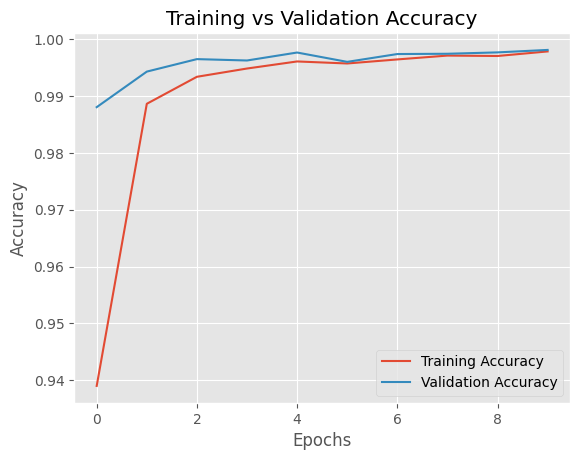

In [13]:
import matplotlib.pyplot as plt
history = model.fit(X_train, cat, epochs=10, batch_size=200, shuffle=True, verbose=1, validation_split=0.2)

plt.style.use('ggplot')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [14]:
df_test = pd.read_csv('test_final.csv',index_col=False)
y_test = df_test[['2025']]
y_test = np.array(y_test)
y_test = to_categorical(y_test, num_classes=13)

x_test = df_test.drop(columns=['2025'])

test_np = x_test.to_numpy()
x_test = test_np.reshape(test_np.shape[0], 45, 45, 1)

x_test.shape

(51727, 45, 45, 1)

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

1617/1617 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9962 - loss: 0.0192
Test loss: 0.01740856096148491
Test accuracy: 0.9961915612220764


In [16]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
model.save_weights("model_final.weights.h5")


In [17]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D,MaxPooling2D 
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [18]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.weights.h5")

In [19]:
import cv2
import numpy as np
img = cv2.imread(r'Untitled.png',cv2.IMREAD_GRAYSCALE)
# img = cv2.imread(r'D:\handwritting_equation\Untitled.png',cv2.IMREAD_GRAYSCALE)

In [20]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [21]:
if img is not None:
    img = ~img  # Đảo màu
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    # Tìm contours của các chữ số trong ảnh
    ctrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # Sắp xếp contours theo vị trí từ trái sang phải
    cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    train_data = []
    rects = [cv2.boundingRect(c) for c in cnt]  # Lưu danh sách (x, y, w, h)
    
    final_rect = []
    for r in rects:
        x, y, w, h = r
        if w * h > 40:  # Bỏ qua các vùng quá nhỏ (nhiễu)
            final_rect.append(r)
    
    for r in final_rect:
        x, y, w, h = r
        im_crop = thresh[y:y+h, x:x+w]  # Crop chính xác ký tự
        padding = 10
        im_crop = thresh[max(0, y-padding):min(y+h+padding, thresh.shape[0]),
                        max(0, x-padding):min(x+w+padding, thresh.shape[1])]

        # Chuẩn hóa kích thước ảnh về (28, 28)
        im_resize = cv2.resize(im_crop, (45, 45), interpolation=cv2.INTER_AREA)
        # im_resize = np.reshape(im_resize, (45, 45, 1))  # Chuyển thành dạng tensor
    
        train_data.append(im_resize)    

    # train_data = []
    # for c in cnt:

    # rects = [cv2.boundingRect(c) for c in cnt]  # Lưu danh sách (x, y, w, h)
    
    # final_rect = []
    # for c in cnt:
    #     x, y, w, h = r
    #     # if w * h > 1:  # Bỏ qua các vùng quá nhỏ (nhiễu)
    #     final_rect.append(r)
    
    # for r in final_rect:
    #     x, y, w, h = r
    #     im_crop = thresh[y:y+h, x:x+w]  # Crop chính xác ký tự
        
    #     # Chuẩn hóa kích thước ảnh về (28, 28)
    #     im_resize = cv2.resize(im_crop, (28, 28), interpolation=cv2.INTER_AREA)
    #     im_resize = np.reshape(im_resize, (28, 28, 1))  # Chuyển thành dạng tensor
    
    #     train_data.append(im_resize)    


In [22]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,45,45,1)
    result = np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        print("-")
        s=s+'-'
    if(result[0]==11):
        print("+")
        s=s+'+'
    if(result[0]==12):
        print("*")
        s=s+'*'
    if(result[0]==0):
        print("0")
        s=s+'0'
    if(result[0]==1):
        print("1")
        s=s+'1'
    if(result[0]==2):
        print("2")
        s=s+'2'
    if(result[0]==3):
        print("3")
        s=s+'3'
    if(result[0]==4):
        print("4")
        s=s+'4'
    if(result[0]==5):
        print("5")
        s=s+'5'
    if(result[0]==6):
        print("6")
        s=s+'6'
    if(result[0]==7):
        print("7")
        s=s+'7'
    if(result[0]==8):
        print("8")
        s=s+'8'
    if(result[0]==9):
        print("9")  
        s=s+'9'

print(s)
try:
    result = eval(s)  # Tính toán chuỗi biểu thức
    print("Kết quả:", result)
except Exception as e:
    print("Lỗi tính toán:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
-
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0
871-330
Kết quả: 541


## Our Model was successfully Tested 

# Thank You !

In [23]:
labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '-', 11: '+', 12: '*'
}

for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i]).reshape(1, 45, 45, 1)

    # Dự đoán xác suất
    probs = loaded_model.predict(train_data[i])[0]

    # Lấy top 3 nhãn có xác suất cao nhất
    top3_indices = probs.argsort()[-3:][::-1]  # Sắp xếp giảm dần
    top3_labels = [(labels[idx], probs[idx]) for idx in top3_indices]

    print(f"Ảnh {i+1}:")
    for label, prob in top3_labels:
        print(f"  → {label} với xác suất {prob:.4f}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Ảnh 1:
  → 8 với xác suất 0.9997
  → 2 với xác suất 0.0002
  → 6 với xác suất 0.0001

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Ảnh 2:
  → 7 với xác suất 0.9742
  → 2 với xác suất 0.0084
  → + với xác suất 0.0076

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Ảnh 3:
  → 1 với xác suất 1.0000
  → 9 với xác suất 0.0000
  → + với xác suất 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Ảnh 4:
  → - với xác suất 0.8456
  → + với xác suất 0.1366
  → 2 với xác suất 0.0075

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Ảnh 5:
  → 3 với xác suất 0.9131
  → 5 với xác suất 0.0869
  → 9 với xác suất 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Ảnh 6:
  → 3 với xác suất 0.9842
  → 2 với xác suất 0.0091
  → 7 với xác suất 0.0042

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Ảnh 7:
  → 0 với xác suất 0.9699
  → 5 với xác suất 0.0165
  → 6 với xác suất 0.0042

